# Practical Traffic Analysis Attacks on Secure Messaging Applications.

In this task, we're delving into the world of "Practical Traffic Analysis Attacks on Secure Messaging Applications." While secure messaging keeps our communication encrypted, it's not entirely safe from evolving threats. Unlike regular attacks, traffic analysis sneaks through patterns and network timing to uncover sensitive info.

These attacks are tricky, as they focus on the core of secure messaging. By studying traffic patterns, bad actors can figure out how often people talk, their interactions, and even get hints about what's being said. Our investigation checks out different parts of traffic analysis, like pulling out metadata, checking message lengths, looking at when data packets move, finding connections in traffic, and even profiling users.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def display(file_name):
    # Load the data from the CSV file
    data = pd.read_csv(file_name)
    data = data[data['Info'] == 'Application Data']
    # Calculate the inter-message delays
    data['Delay'] = data['Time'].diff()

    # Set up a consistent color palette
    color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

    # Plot the inter-message delays
    plt.figure(figsize=(15, 5))
    plt.plot(data['Delay'], color=color_palette[0])
    plt.title('Inter-Message Delays', fontsize=16)
    plt.xlabel('Message Number', fontsize=12)
    plt.ylabel('Delay (s)', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot the message sizes
    plt.figure(figsize=(15, 4))
    plt.plot(data['Length'], color=color_palette[1])
    plt.title('Message Sizes', fontsize=16)
    plt.xlabel('Message Number', fontsize=12)
    plt.ylabel('Size (bytes)', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot the packet length as a function of time
    plt.figure(figsize=(15, 4))
    plt.bar(data['Time'], data['Length'], color=color_palette[2])
    plt.title('Packet Length as a Function of Time', fontsize=16)
    plt.xlabel('Time (s)', fontsize=12)
    plt.ylabel('Size (bytes)', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot the PDF as a function of inter-message delays in a new color
    plt.figure(figsize=(15, 4))
    plt.hist(data['Delay'].dropna(), bins=50, density=True, color=color_palette[3], alpha=0.7)
    plt.title('PDF of Inter-Message Delays', fontsize=16)
    plt.xlabel('Inter-Message Delay (s)', fontsize=12)
    plt.ylabel('Probability Density', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Calculate the CDF of inter-message delays
    delay_values = data['Delay'].dropna().values
    delay_values.sort()
    cdf = np.arange(1, len(delay_values) + 1) / len(delay_values)

    # Plot the CDF of inter-message delays
    plt.figure(figsize=(15, 4))
    plt.plot(delay_values, cdf, color=color_palette[1])
    plt.title('CDF of Inter-Message Delays', fontsize=16)
    plt.xlabel('Inter-Message Delay (s)', fontsize=12)
    plt.ylabel('Cumulative Probability', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
     # Calculate the CCDF values
    ccdf = 1 - cdf

    # Plot the CCDF of inter-message delays
    plt.figure(figsize=(15, 4))
    plt.plot(delay_values, ccdf, color='black')  # Set color to black
    plt.title('CCDF of Inter-Message Delays', fontsize=16)
    plt.xlabel('Inter-Message Delay (s)', fontsize=12)
    plt.ylabel('Complementary Cumulative Probability', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return data

# Using Messages

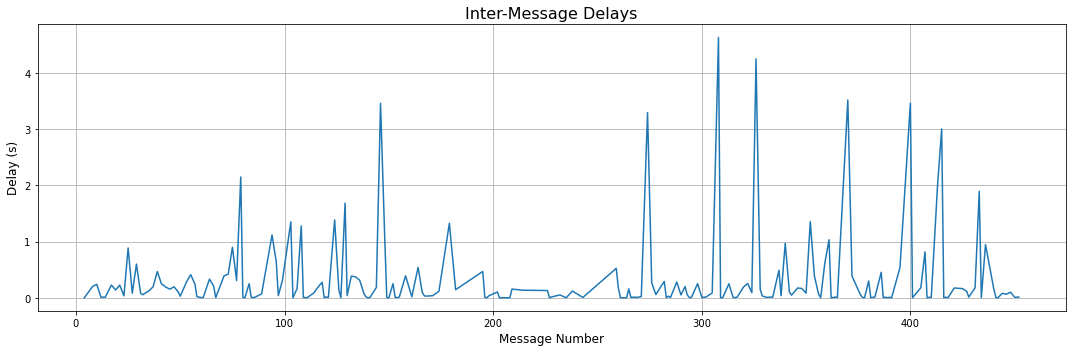

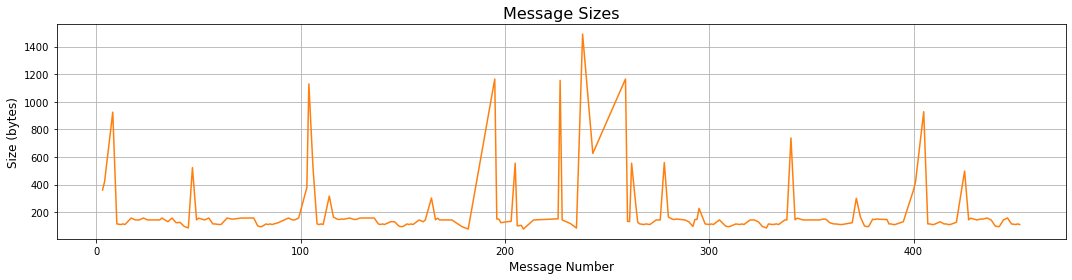

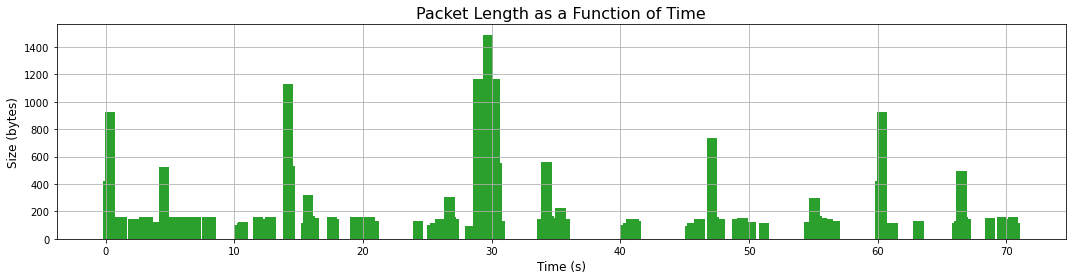

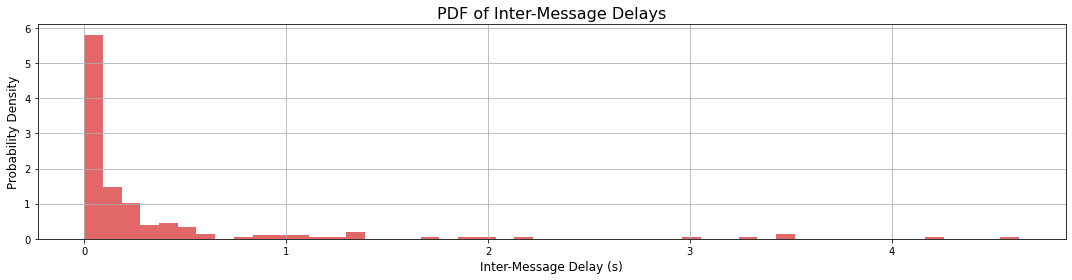

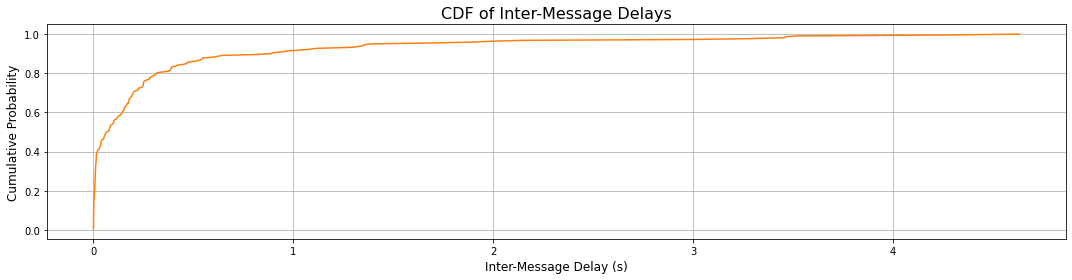

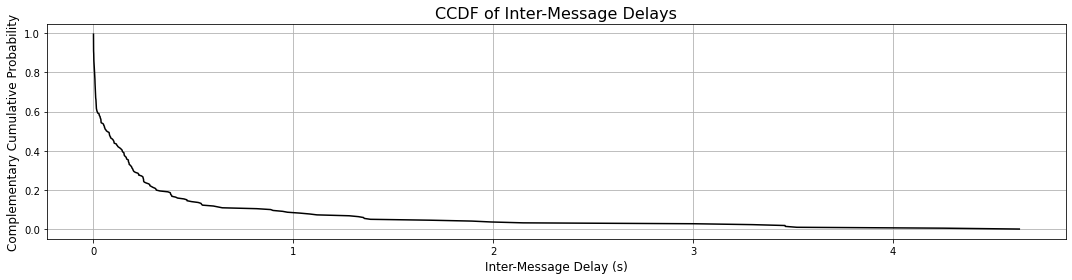

In [19]:
data = display('normalTextRecording.csv')

### More statistical information about the data

In [20]:
data.describe()

,No.,Time,Length,Delay
count,222.000000,222.000000,222.000000,221.000000
mean,8526.319820,32.340212,186.189189,0.318896
std,6178.702639,20.745509,199.188172,0.712707
min,39.000000,0.154735,78.000000,0.000000
25%,3016.500000,15.616326,112.000000,0.007633
50%,7346.500000,29.667104,144.000000,0.069654
75%,13498.250000,48.712742,151.000000,0.250453
max,20473.000000,70.630780,1490.000000,4.630704


# Using Images

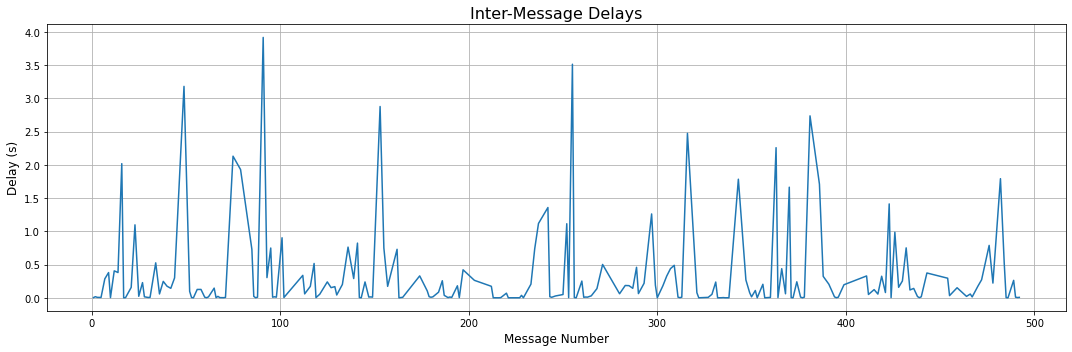

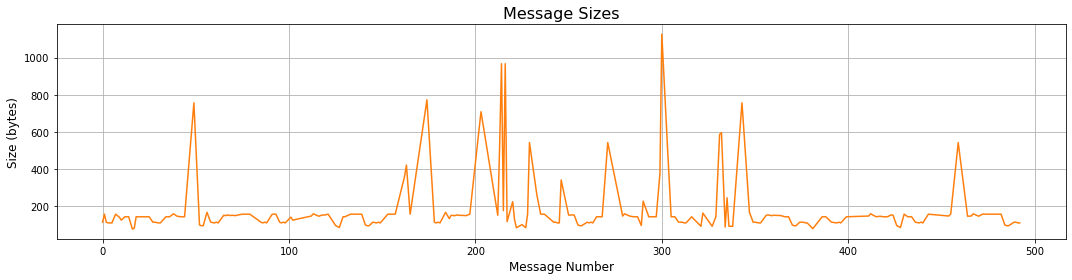

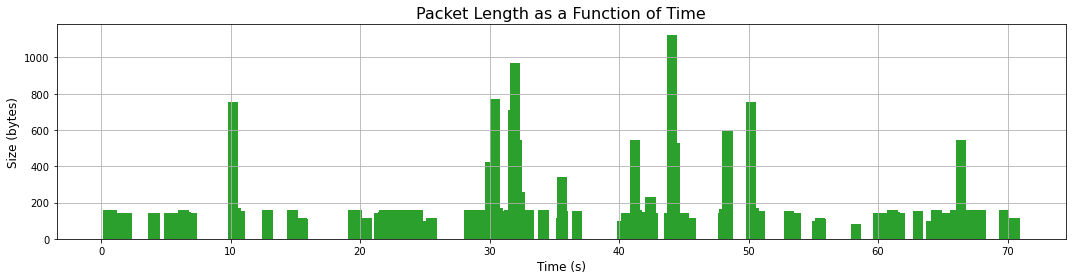

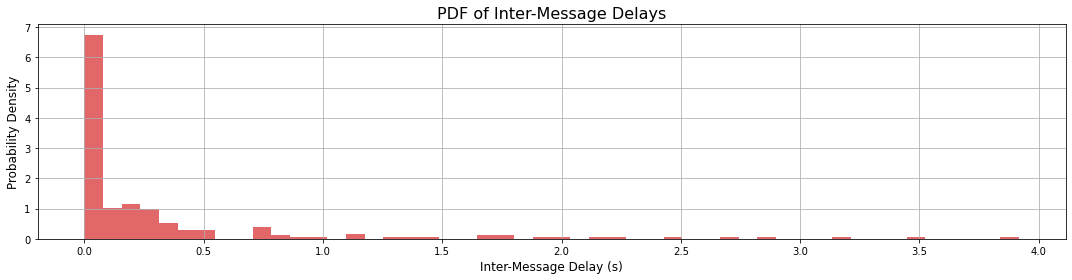

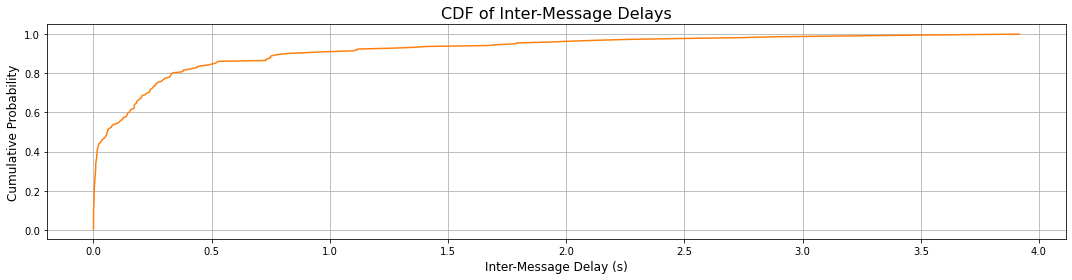

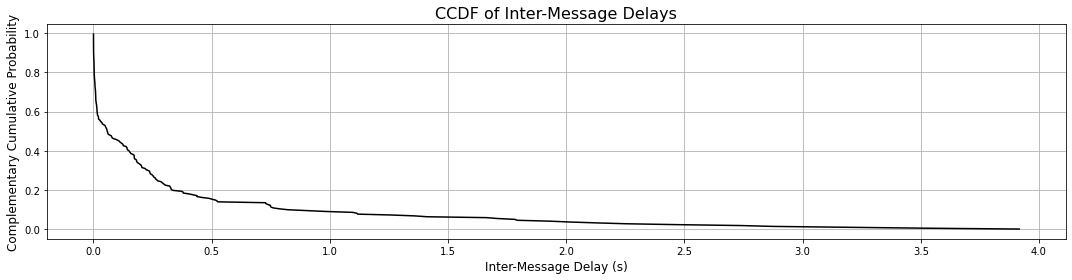

In [21]:
data = display('imagesRecording2Maya.csv')

In [22]:
data.describe()

,No.,Time,Length,Delay
count,224.000000,224.000000,224.000000,223.000000
mean,10717.857143,36.218733,173.004464,0.314036
std,6116.528826,20.281496,152.313210,0.632738
min,131.000000,0.515013,78.000000,0.000000
25%,5755.750000,21.835451,111.000000,0.005833
50%,10775.000000,34.838299,144.000000,0.058603
75%,15032.500000,50.854771,158.000000,0.269528
max,21411.000000,70.545108,1126.000000,3.916707


# Using Voice Messages

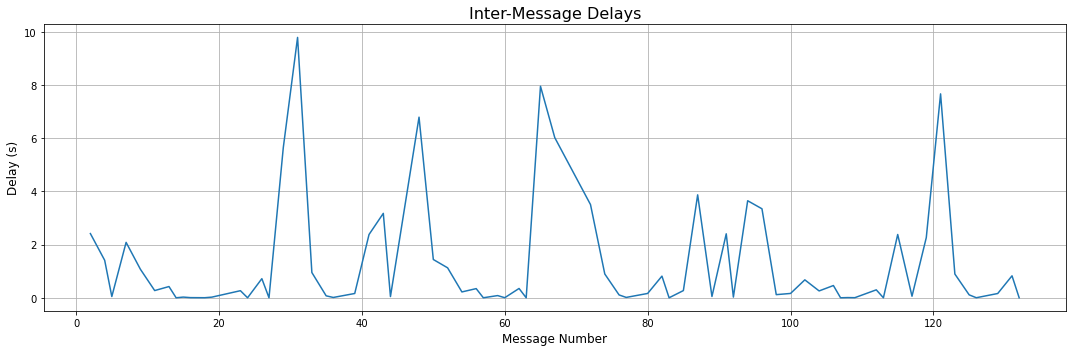

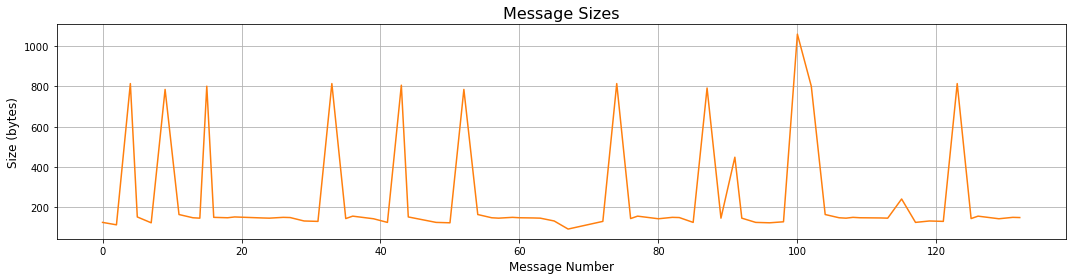

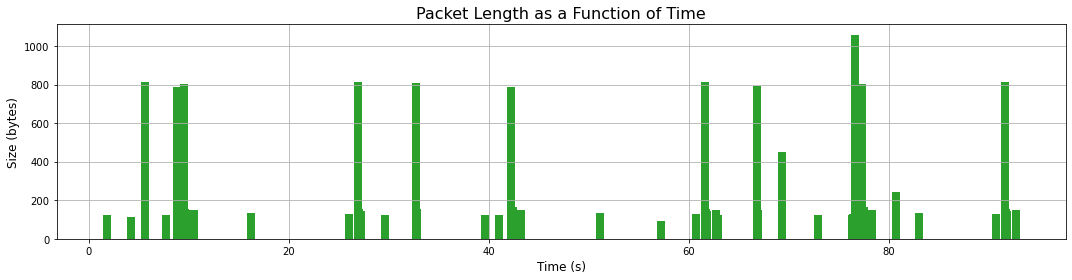

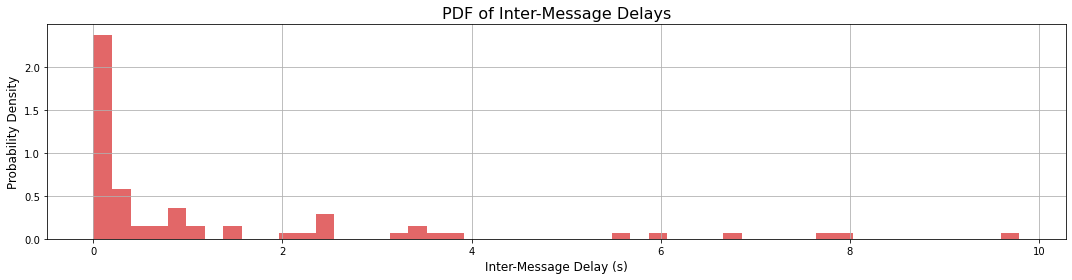

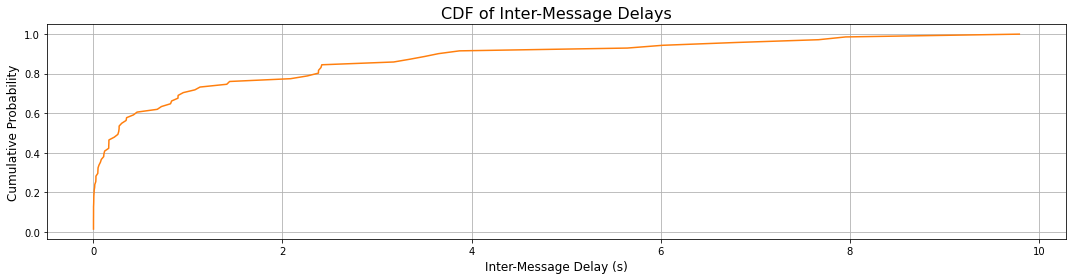

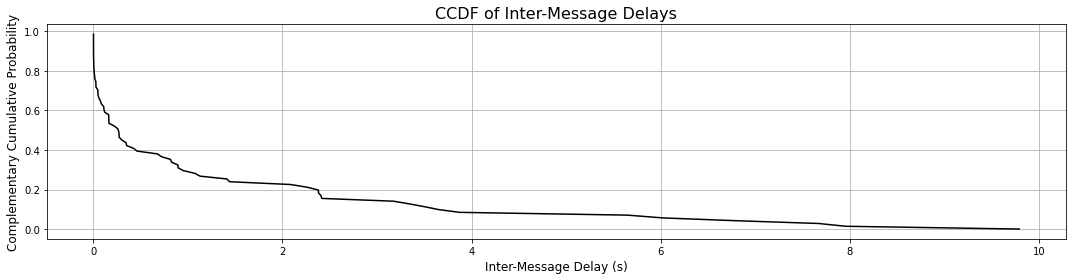

In [23]:
data = display('rec3.csv')

In [24]:
data.describe()

,No.,Time,Length,Delay
count,72.000000,72.000000,72.000000,71.000000
mean,500.694444,48.590932,252.694444,1.280111
std,347.235709,29.444849,250.028372,2.147348
min,26.000000,1.784925,93.000000,0.001491
25%,182.250000,23.562547,141.250000,0.026459
50%,416.000000,47.165172,149.000000,0.268035
75%,880.000000,76.752081,157.000000,1.425747
max,1061.000000,92.672784,1059.000000,9.790944


# Using Videos

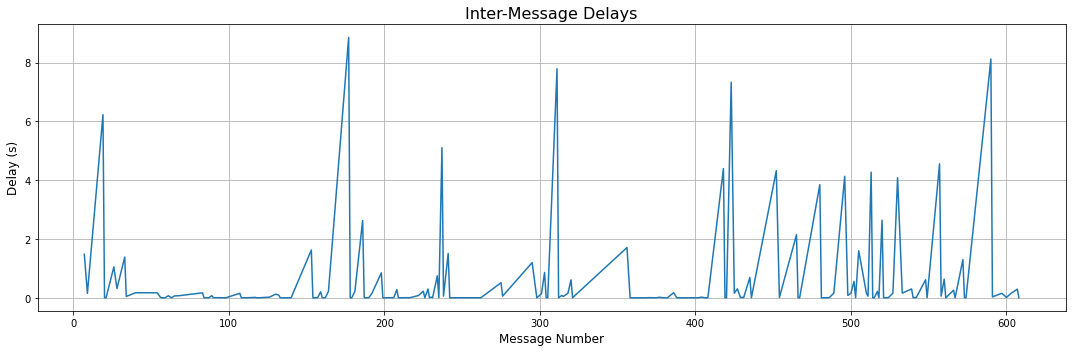

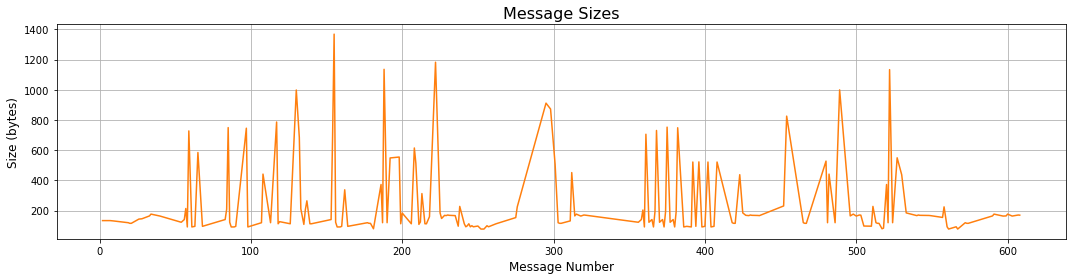

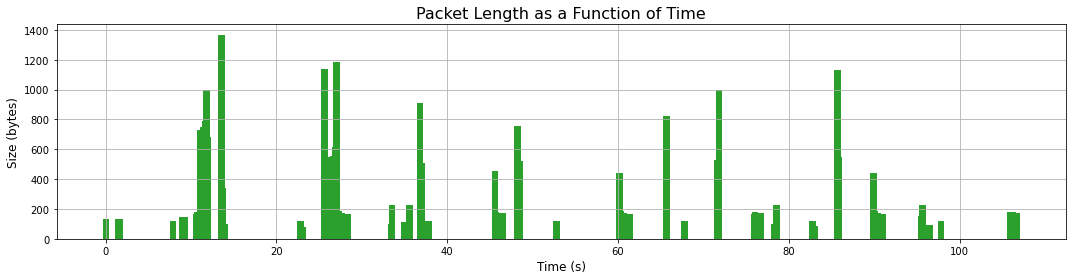

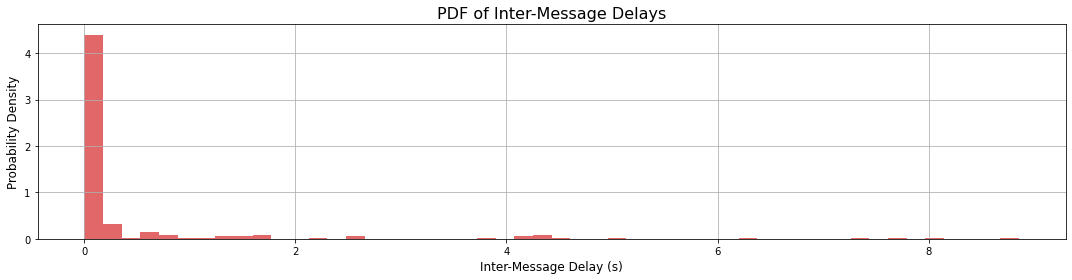

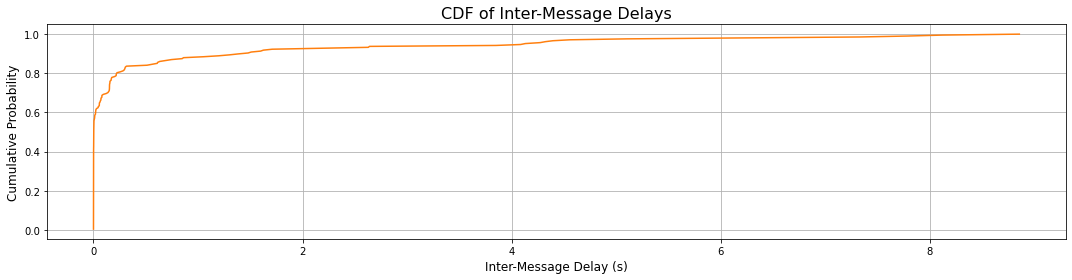

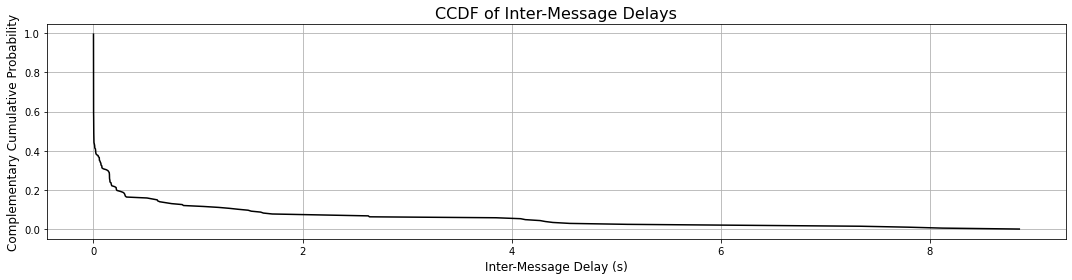

In [5]:
data = display('videoRecording.csv')

In [6]:
data.describe()

,No.,Time,Length,Delay
count,209.000000,209.000000,209.000000,208.000000
mean,993.473684,44.481288,237.775120,0.512459
std,571.098453,29.185577,240.452402,1.453374
min,3.000000,0.046656,78.000000,0.000000
25%,316.000000,13.962808,113.000000,0.000139
50%,1044.000000,37.809191,141.000000,0.002670
75%,1450.000000,65.652087,194.000000,0.156682
max,1897.000000,106.638231,1369.000000,8.854400


# Combining all together

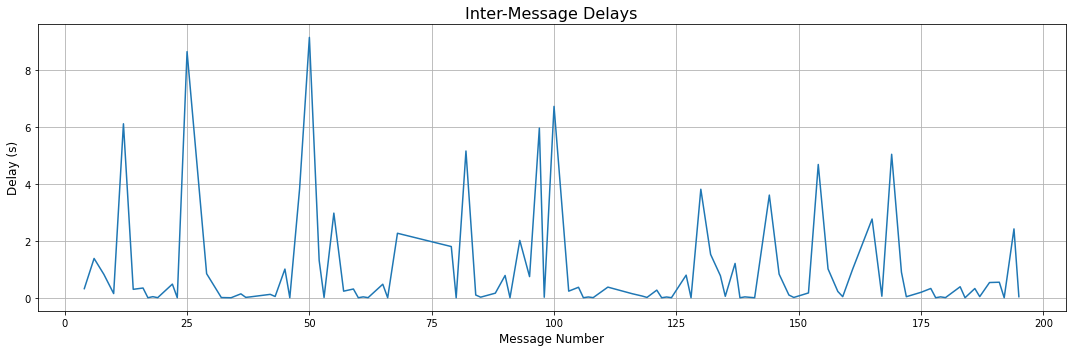

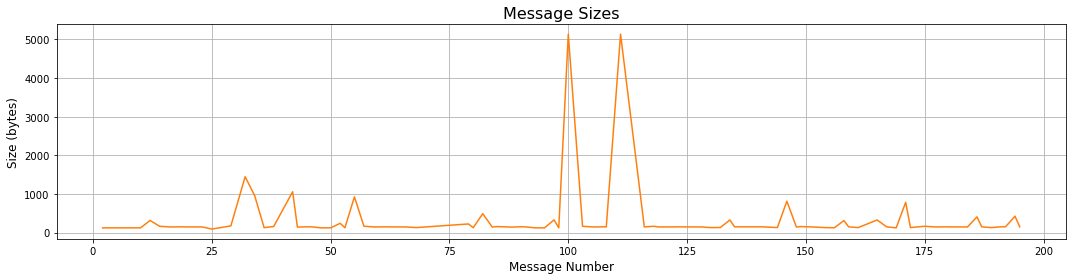

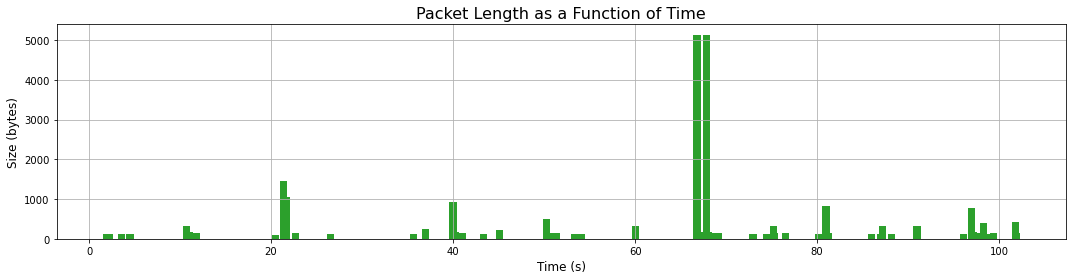

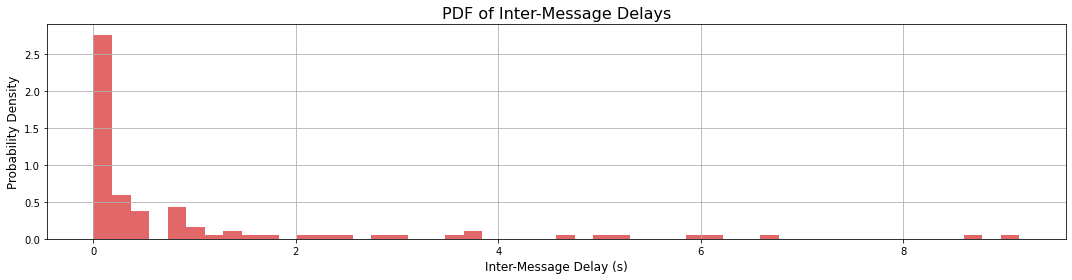

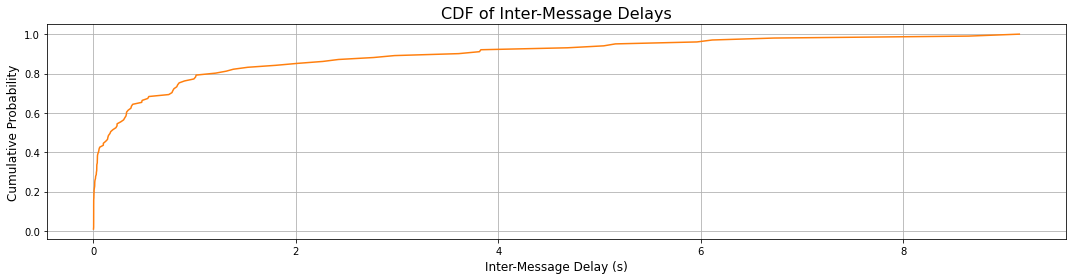

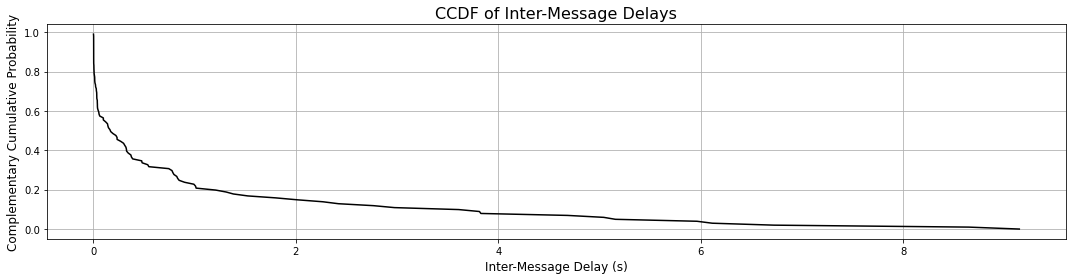

In [25]:
data = display('rec4.csv')

In [26]:
data.describe()

,No.,Time,Length,Delay
count,102.000000,102.000000,102.000000,101.000000
mean,666.715686,57.394427,311.166667,0.989813
std,314.357159,30.402729,718.520221,1.862559
min,13.000000,1.880436,93.000000,0.000000
25%,450.000000,36.003734,144.000000,0.014488
50%,735.500000,67.205893,149.000000,0.170315
75%,878.750000,81.069952,157.000000,0.846312
max,1143.000000,101.851544,5137.000000,9.147929


# Adding noise to the data

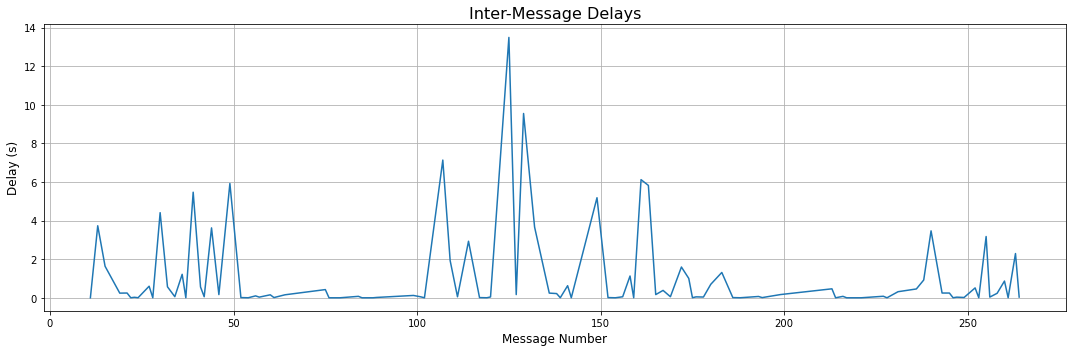

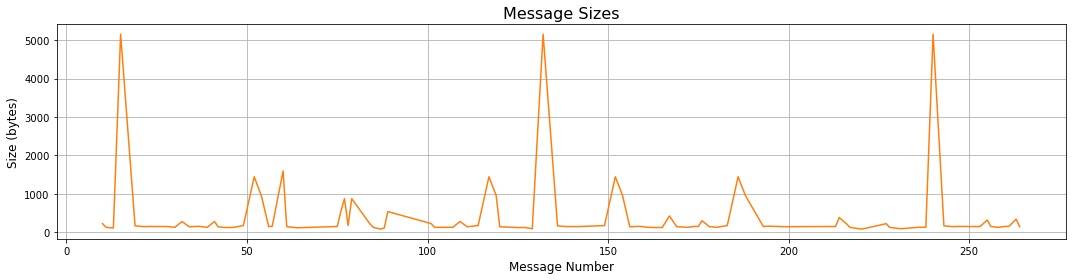

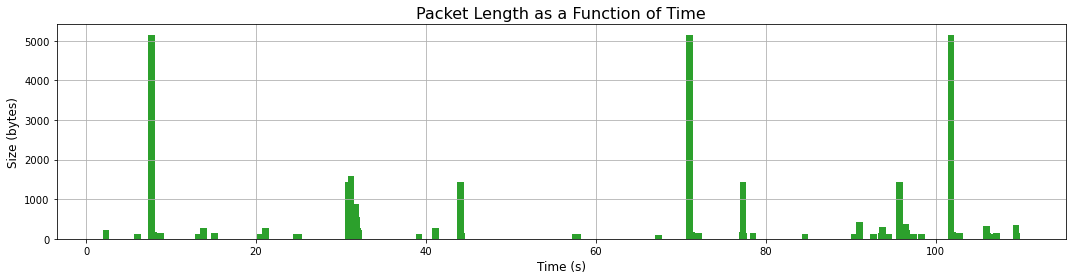

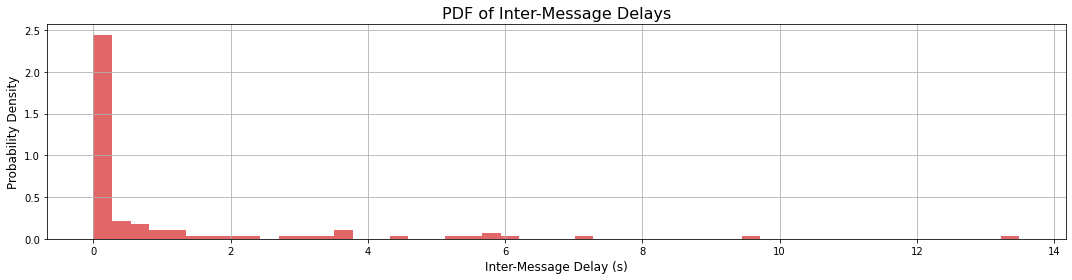

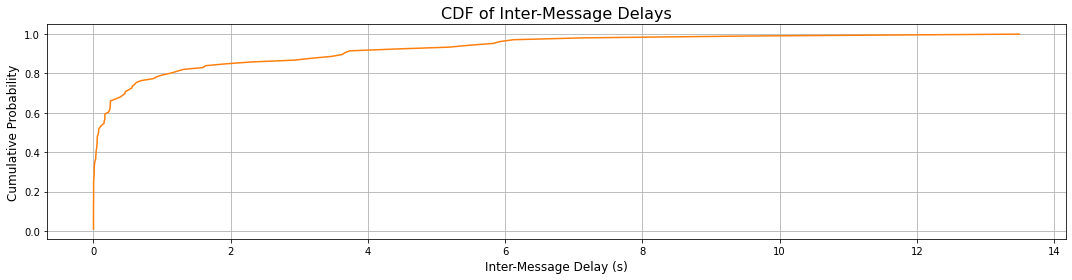

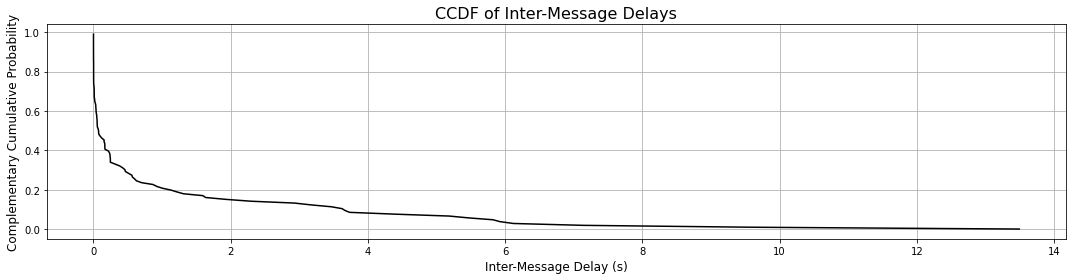

In [27]:
data = display('rec5.csv')

In [28]:
data.describe()

,No.,Time,Length,Delay
count,107.000000,107.000000,107.000000,106.000000
mean,516.112150,60.916831,415.654206,1.010635
std,256.968147,35.571763,873.240647,2.171007
min,122.000000,2.339319,85.000000,0.000000
25%,273.500000,31.180564,131.000000,0.002798
50%,542.000000,71.250706,152.000000,0.074154
75%,718.000000,95.904526,225.000000,0.619514
max,961.000000,109.466643,5158.000000,13.494654


# Adding even more noise

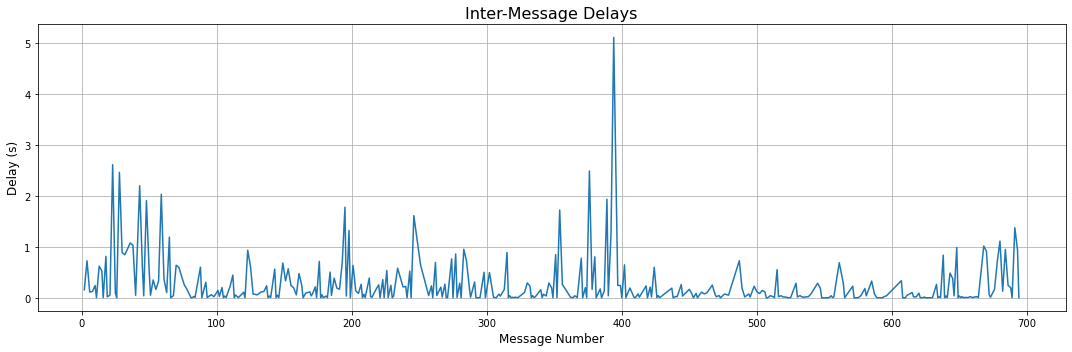

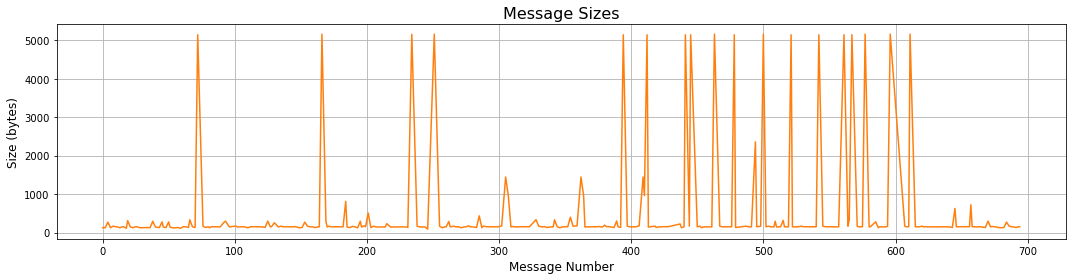

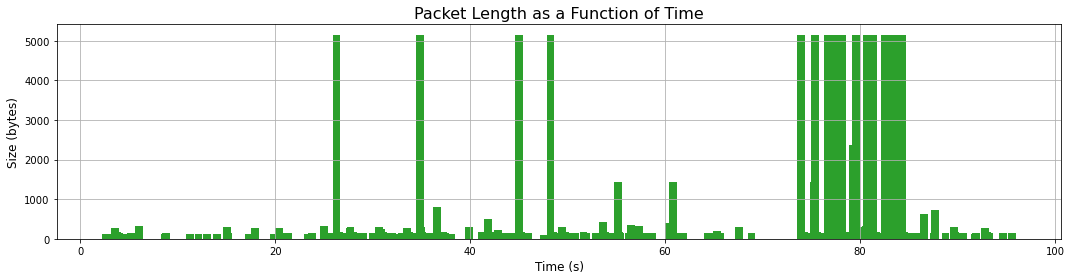

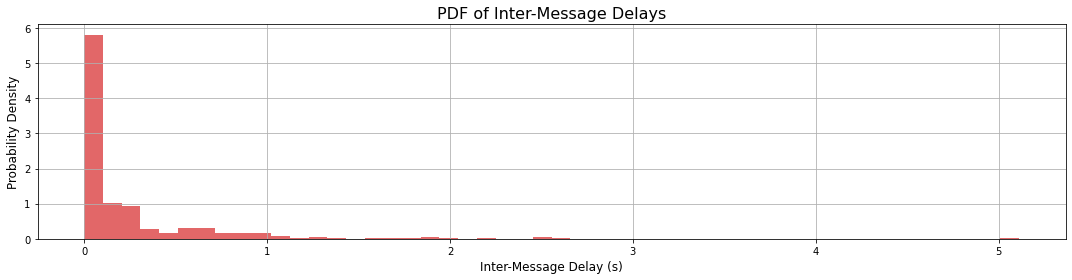

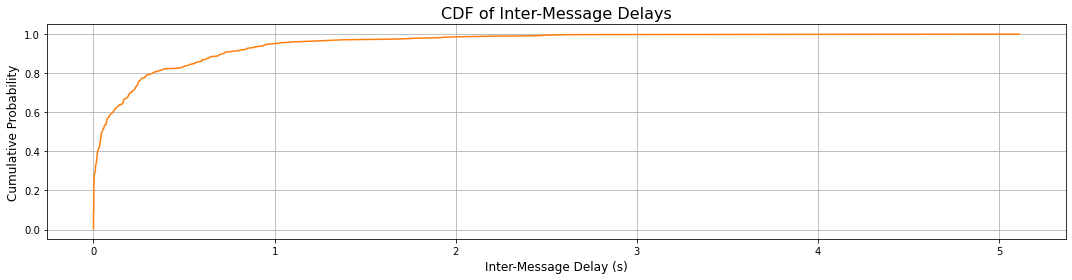

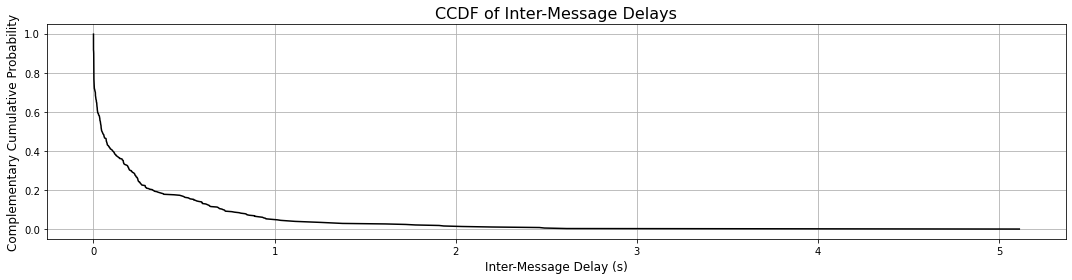

In [29]:
data = display('rec6.csv')

In [30]:
data.describe()

,No.,Time,Length,Delay
count,383.000000,383.000000,383.000000,382.000000
mean,19805.177546,57.830622,423.140992,0.243222
std,8387.766762,24.924776,1067.055859,0.481106
min,910.000000,2.659691,93.000000,0.000000
25%,12668.500000,36.004609,150.000000,0.003265
50%,19325.000000,57.638076,152.000000,0.047436
75%,27642.500000,81.030759,159.000000,0.245980
max,32826.000000,95.570323,5158.000000,5.111292
